In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
url_test = 'https://raw.githubusercontent.com/soyHenry/Datathon/main/hospitalizaciones_test.csv'
url_train = 'https://raw.githubusercontent.com/soyHenry/Datathon/main/hospitalizaciones_train.csv'

In [6]:
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [26]:
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [27]:
df_test.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [9]:
df_train.shape

(410000, 15)

In [6]:
df_test.shape

(90000, 14)

In [ ]:
# Tenemos muchisimos datos, asi que tendremos que limpiarlos primeros y decidir cuales datos usaremos y cuales no ! 
# Antes de desarrollar un modelo de Machine Learning

In [29]:
print(df_train.keys())
print(df_test.keys())

Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit',
       'Stay (in days)'],
      dtype='object')
Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit'],
      dtype='object')


In [30]:
df_train.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,12.378193
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,7.905618
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,3.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,8.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,9.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,11.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,51.000000


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [34]:
df_train.isna().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

In [11]:
df_train[df_train.duplicated()]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)


In [ ]:
# Podemos ver que no tenemos datos ni nulos ni duplicados en nuestro dataset de entrenamiento

In [ ]:
# Features Engineering 

In [ ]:
# Primero miremos nuestro target 'Stay in days'

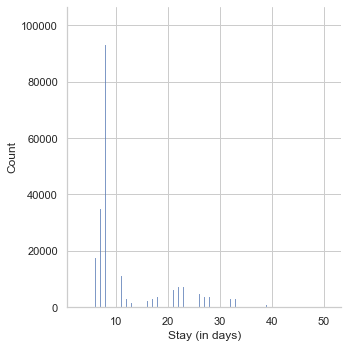

In [21]:
sns.displot(df_train['Stay (in days)'])

<AxesSubplot: xlabel='Stay (in days)', ylabel='Density'>

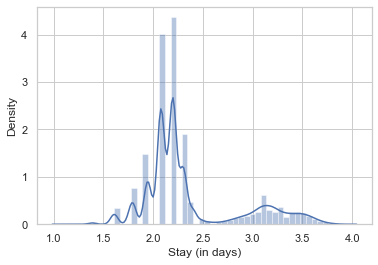

In [24]:
sns.distplot(np.log(df_train['Stay (in days)']))

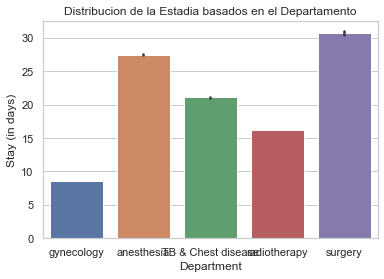

In [36]:
sns.barplot(x="Department", y="Stay (in days)", data=df_train)
plt.title("Distribucion de la Estadia basados en el Departamento")
plt.show()

In [ ]:
# Aparte de ginecologia, podemos ver la distribucion de nuestros datos, asi que si una persona llega para el Departamento de Cirugia es MUY probable 
# que su estadia sea bastante larga. Asi que el Departamento va a ser una variable muy importante para nuestro modelo

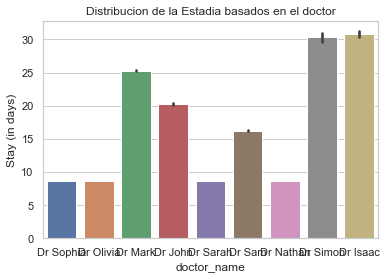

In [45]:
sns.barplot(x='doctor_name', y="Stay (in days)", data=df_train)
plt.title("Distribucion de la Estadia basados en el doctor")
plt.show()

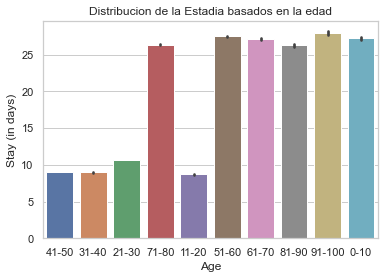

In [44]:
sns.barplot(x='Age', y="Stay (in days)", data=df_train)
plt.title("Distribucion de la Estadia basados en la edad")
plt.show()

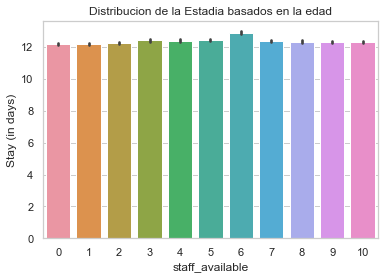

In [59]:
sns.barplot(x='staff_available', y="Stay (in days)", data=df_train)
plt.title("Distribucion de la Estadia basados en la edad")
plt.show()

In [ ]:
# Este grafico nos muestra como los adultos mayores (mayores a 50 años) y niños (de 0 a 10 años) tienden a tener una estancia larga 

In [ ]:
# Vamos a prescindir de las columnas 'Ward_Facility_Code', 'patien_Id', 'gender' y 'Visitors with patient'
# Considero que estas variables no son importantes a la hora de predecir la estadia total de un paciente

In [ ]:
df_train.drop(['Ward_Facility_Code','patientid', 'gender', 'Visitors with Patient'], axis=1, inplace=True)
df_test.drop(['Ward_Facility_Code', 'patientid', 'gender', 'Visitors with Patient'], axis=1, inplace=True)

In [61]:
df_train.head()

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,Dr Sophia,0,41-50,Trauma,Extreme,Diabetes,Yes,2966.408696,8
1,4,gynecology,Dr Sophia,2,31-40,Trauma,Minor,Heart disease,No,3554.835677,9
2,2,gynecology,Dr Sophia,8,21-30,Trauma,Extreme,Diabetes,Yes,5624.733654,7
3,4,gynecology,Dr Olivia,7,31-40,Urgent,Moderate,None,No,4814.149231,8
4,2,anesthesia,Dr Mark,10,71-80,Trauma,Moderate,Diabetes,No,5169.269637,34


In [57]:
# Tengo que convertir a numero: 'Department', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions','Insurance' = 7 features

# Como tenemos varias variables categorias en nuestros datos, tenemos que representar estos strings en valores numericos para poder usar nuestro modelo
# Podemos realizar este proceso con LabelEncoder

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [62]:
df_train.Department = le.fit_transform(df_train.Department)
df_test.Department = le.fit_transform(df_test.Department)

In [63]:
df_train.doctor_name = le.fit_transform(df_train.doctor_name)
df_test.doctor_name = le.fit_transform(df_test.doctor_name)

In [65]:
df_train.Age = le.fit_transform(df_train.Age)
df_test.Age = le.fit_transform(df_test.Age)

df_train['Type of Admission'] = le.fit_transform(df_train['Type of Admission'])
df_test['Type of Admission'] = le.fit_transform(df_test['Type of Admission'])

df_train['Severity of Illness'] = le.fit_transform(df_train['Severity of Illness'])
df_test['Severity of Illness'] = le.fit_transform(df_test['Severity of Illness'])

df_train['health_conditions'] = le.fit_transform(df_train['health_conditions'])
df_test['health_conditions'] = le.fit_transform(df_test['health_conditions'])

df_train['Insurance'] = le.fit_transform(df_train['Insurance'])
df_test['Insurance'] = le.fit_transform(df_test['Insurance'])

In [ ]:
# Si vemos los datos de 'Admission Deposit' vemos que los datos se desvian muchisimo respecto a los otros, esto puede causar problemas en nuestro modelo
# Asi que vamos a escalarlos usando un StandardScaler

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

deposit_train = np.array(df_train['Admission_Deposit']).reshape(-1, 1)
deposit_test = np.array(df_test['Admission_Deposit']).reshape(-1, 1)

df_train['Admission_Deposit'] = scaler.fit_transform(deposit_train)
df_test['Admission_Deposit'] = scaler.fit_transform(deposit_test)

In [68]:
df_train.head()

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay (in days)
0,4,2,8,0,4,1,0,1,1,-1.677467,8
1,4,2,8,2,3,1,1,2,0,-1.115679,9
2,2,2,8,8,2,1,0,1,1,0.860510,7
3,4,2,4,7,3,2,2,4,0,0.086622,8
4,2,1,2,10,7,1,2,1,0,0.425666,34


In [69]:
df_test.head()

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit
0,3,2,4,10,2,1,2,5,0,0.030903
1,2,0,1,4,5,1,2,0,1,-0.568386
2,2,3,1,7,5,1,2,4,0,0.708567
3,2,2,4,1,2,1,2,4,1,-0.697560
4,2,1,1,7,5,1,0,1,0,0.051106


In [70]:
correlations = df_train.corr()
correlations = correlations['Stay (in days)'].sort_values(ascending=False)
features = correlations.index[1:6]
correlations

Stay (in days)                       1.000000
Age                                  0.585201
Admission_Deposit                    0.043899
Type of Admission                    0.035811
Severity of Illness                  0.024316
staff_available                      0.006673
health_conditions                    0.001772
Insurance                           -0.000947
Available Extra Rooms in Hospital   -0.019383
Department                          -0.204050
doctor_name                         -0.444867
Name: Stay (in days), dtype: float64

In [ ]:
# Observemos como la edad es la variable con mayor correlacion con la estadia, mientras que el departamento o el doctor, son datos que no nos van a ayudar
# mucho a la hora de predecir la estadia de un paciente

In [29]:
# X = df_train[['Available Extra Rooms in Hospital', 'Department', 'staff_available', 
            'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 
            'Insurance', 'Admission_Deposit']] 

 # y = df_train['Stay (in days)'] # Etiqueta a predecir

In [ ]:
# Ahora vamos a definir los sets de entrenamiento, quitamos la columna de Estadia ya que no las queremos involucrar en nuestro entrenamiento-
# Luego definimos la variable de Stay in days como nuestra variable Target 
# Y X_predict es nuestro set con el cual predeciremos la variable target

In [87]:
X = df_train.drop(['Stay (in days)'], axis=1)
y = df_train['Stay (in days)']
X_predict = df_test

In [ ]:
# Dividimos nuestro set de entrenamiento, esto nos ayudara a evaluar el performance de nuestro modelo y a que no haya overfitting

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Para este proyecto estaremos probando el modelo de Arbol de Decision, con una profundidad de 5 niveles 

In [81]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 5, random_state = 42) 

In [82]:
# Entrenamos el modelo

clf.fit(X_train.values,y_train.values)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [83]:
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = clf.predict(X_train.values)

# Predecimos sobre nuestro set de testeo

y_test_pred = clf.predict(X_test.values)

In [84]:
from sklearn.metrics import accuracy_score  # Vemos la precision del modelo

print('Precisión en el set de entrenamiento: {0: .2f}'.format(clf.score(X_train, y_train)))
print('Precisión en el set de testeo: {0: .2f}'.format(clf.score(X_test, y_test)))

Precisión en el set de entrenamiento:  0.33
Precisión en el set de testeo:  0.33


In [85]:
from sklearn.metrics import recall_score  # Hallamos el recall

recall = recall_score(y_test, y_test_pred, average= 'micro')
print(recall)

0.3257317073170732


In [88]:
# Ahora vamos a hacer las predicciones con el archivo .test que contiene 91000 filas 

predicciones_final = clf.predict(X_predict)

predicciones = pd.DataFrame(predicciones_final, columns= ['pred'])

predicciones.to_csv('NicoGit333.csv', index= False)